In [1]:
import pandas as pd 
data = pd.read_csv('강원도 춘천시_관광지 및 상권 정밀 위치기반 이용자 실태 현황_20211221.csv', encoding='cp949')

In [2]:
df = data[data['읍면동'].isin(['조양동','요선동','중앙로2가'])] 

In [3]:
df 

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
2,디자인카페티이오,2021-07-19,카페,37.884288,127.728886,강원,춘천시,요선동,95,46.24,53.76,13.52,20.90,21.89,21.74,21.95,2021-12-21
10,더클래스,2021-07-19,의류판매,37.880166,127.727417,강원,춘천시,중앙로2가,76,55.35,44.65,13.04,20.66,23.88,20.59,21.83,2021-12-21
23,renoma KIDS,2021-07-19,의류판매,37.878562,127.728490,강원,춘천시,조양동,79,30.61,69.39,12.90,20.42,22.32,22.64,21.72,2021-12-21
48,골든노래타운,2021-07-19,유흥주점,37.881911,127.727148,강원,춘천시,요선동,79,63.88,36.12,4.53,13.23,30.56,36.87,14.81,2021-12-21
49,크림,2021-07-19,유흥주점,37.879729,127.729211,강원,춘천시,조양동,129,62.10,37.90,3.67,13.59,31.39,37.17,14.18,2021-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984629,복천닭갈비,2021-11-17,음식점,37.879292,127.727600,강원,춘천시,조양동,149,54.62,45.38,12.99,20.68,23.09,21.51,21.73,2021-12-21
984634,생생타로점,2021-11-17,기타시설,37.878702,127.729365,강원,춘천시,조양동,73,53.34,46.66,13.90,20.90,21.94,21.62,21.64,2021-12-21
984647,요선통닭,2021-11-17,음식점,37.882297,127.727047,강원,춘천시,요선동,253,58.37,41.63,12.09,19.88,22.76,24.33,20.94,2021-12-21
984655,포인트피부과,2021-11-17,병의원,37.879115,127.729202,강원,춘천시,조양동,71,57.02,42.98,12.66,20.29,23.30,22.30,21.45,2021-12-21


In [4]:
# 상호명별 이용자수 합계 구하기
usage_sum = df.groupby('상호명')['이용자수'].sum()

# 상호명별 등장 횟수 구하기
count_by_name = df['상호명'].value_counts()

# 이용자수 합계를 등장 횟수로 나누어 평균 구하기
average_usage = usage_sum / count_by_name

# 평균 이용자수를 데이터프레임에 추가
df['평균이용자수'] = df['상호명'].map(average_usage)

# 중복된 상호명 제거
df.drop_duplicates(subset='상호명', inplace=True)

print(df)

              상호명          날짜    업종         위도          경도  시도  시군구    읍면동  \
2        디자인카페티이오  2021-07-19    카페  37.884288  127.728886  강원  춘천시    요선동   
10           더클래스  2021-07-19  의류판매  37.880166  127.727417  강원  춘천시  중앙로2가   
23    renoma KIDS  2021-07-19  의류판매  37.878562  127.728490  강원  춘천시    조양동   
48         골든노래타운  2021-07-19  유흥주점  37.881911  127.727148  강원  춘천시    요선동   
49             크림  2021-07-19  유흥주점  37.879729  127.729211  강원  춘천시    조양동   
...           ...         ...   ...        ...         ...  ..  ...    ...   
7927       안신경정신과  2021-07-19   병의원  37.879219  127.728632  강원  춘천시    조양동   
7980        FOCUS  2021-07-19  의류판매  37.878650  127.728440  강원  춘천시    조양동   
7994         아기자기  2021-07-19  의류판매  37.878507  127.725337  강원  춘천시  중앙로2가   
8007           미광  2021-07-19  기타시설  37.880114  127.727352  강원  춘천시  중앙로2가   
8021       명동공방카페  2021-07-19   음식점  37.878962  127.726620  강원  춘천시  중앙로2가   

      이용자수   남성비율   여성비율  10대비율  20대비율  30대비율  40대비율  50대이상비율  

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20492\2401372191.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['평균이용자수'] = df['상호명'].map(average_usage)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20492\2401372191.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='상호명', inplace=True)


In [5]:
df

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일,평균이용자수
2,디자인카페티이오,2021-07-19,카페,37.884288,127.728886,강원,춘천시,요선동,95,46.24,53.76,13.52,20.90,21.89,21.74,21.95,2021-12-21,89.032787
10,더클래스,2021-07-19,의류판매,37.880166,127.727417,강원,춘천시,중앙로2가,76,55.35,44.65,13.04,20.66,23.88,20.59,21.83,2021-12-21,75.549180
23,renoma KIDS,2021-07-19,의류판매,37.878562,127.728490,강원,춘천시,조양동,79,30.61,69.39,12.90,20.42,22.32,22.64,21.72,2021-12-21,93.303279
48,골든노래타운,2021-07-19,유흥주점,37.881911,127.727148,강원,춘천시,요선동,79,63.88,36.12,4.53,13.23,30.56,36.87,14.81,2021-12-21,226.868852
49,크림,2021-07-19,유흥주점,37.879729,127.729211,강원,춘천시,조양동,129,62.10,37.90,3.67,13.59,31.39,37.17,14.18,2021-12-21,133.073770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7927,안신경정신과,2021-07-19,병의원,37.879219,127.728632,강원,춘천시,조양동,78,53.83,46.17,14.09,21.00,21.70,21.41,21.80,2021-12-21,78.532787
7980,FOCUS,2021-07-19,의류판매,37.878650,127.728440,강원,춘천시,조양동,79,52.50,47.50,13.80,21.32,22.15,22.69,20.04,2021-12-21,91.024590
7994,아기자기,2021-07-19,의류판매,37.878507,127.725337,강원,춘천시,중앙로2가,76,55.98,44.02,12.71,20.33,23.55,21.91,21.50,2021-12-21,75.549180
8007,미광,2021-07-19,기타시설,37.880114,127.727352,강원,춘천시,중앙로2가,89,52.23,47.77,14.23,20.84,21.64,21.35,21.94,2021-12-21,84.959016


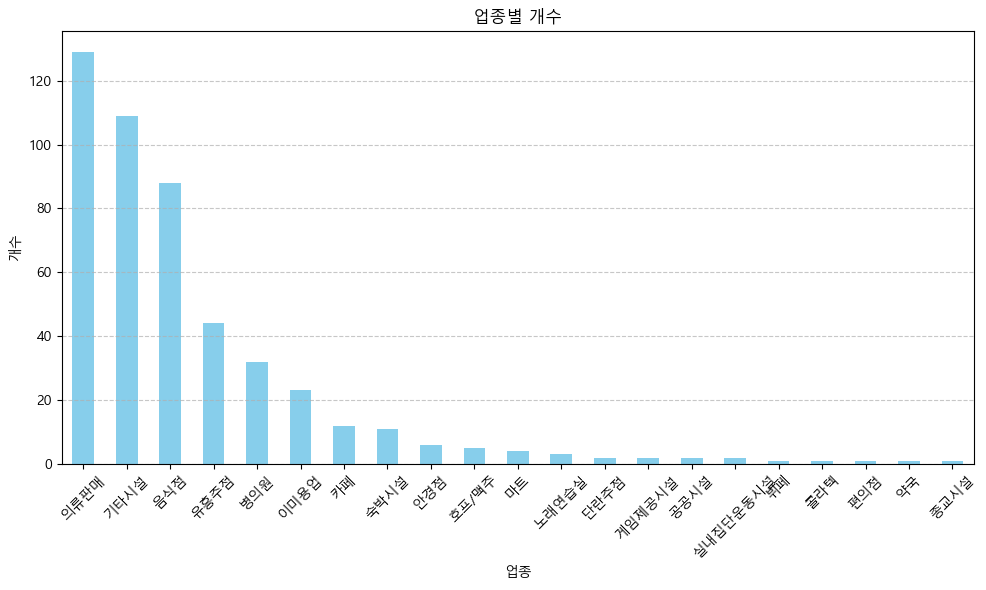

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import matplotlib.pyplot as plt
# 업종별 개수 집계
업종별_개수 = df['업종'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
업종별_개수.plot(kind='bar', color='skyblue')
plt.title('업종별 개수')
plt.xlabel('업종')
plt.ylabel('개수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

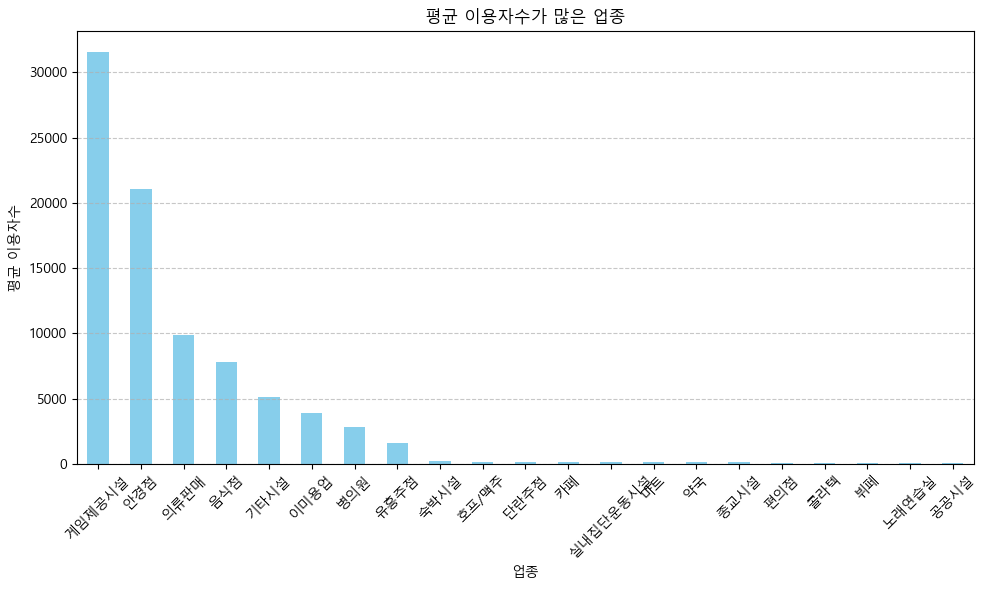

In [7]:
평균이용자수_업종별 = df.groupby('업종')['평균이용자수'].mean().sort_values(ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
평균이용자수_업종별.plot(kind='bar', color='skyblue')
plt.title('평균 이용자수가 많은 업종')
plt.xlabel('업종')
plt.ylabel('평균 이용자수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

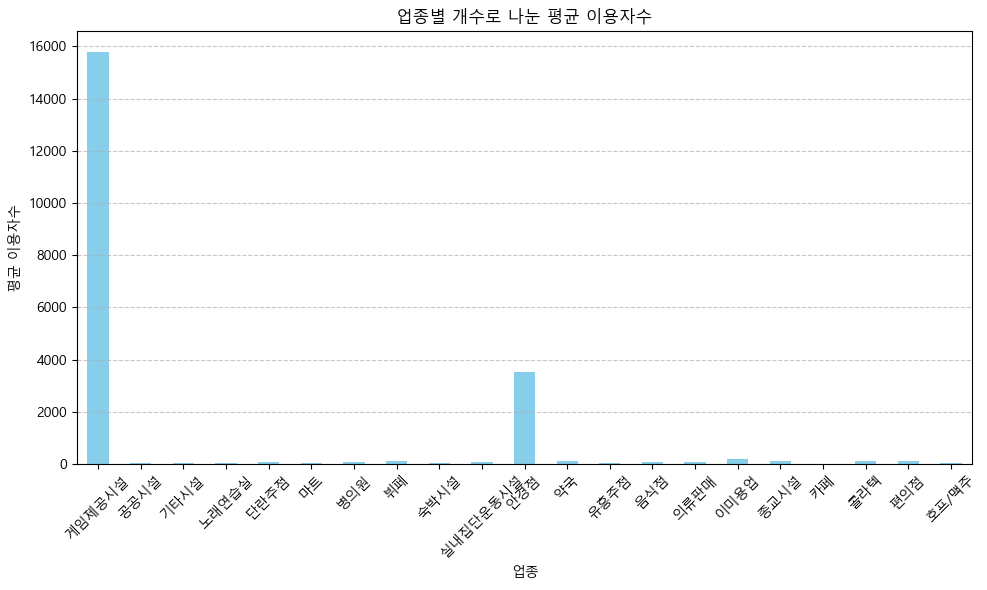

In [8]:
업종별_개수 = df['업종'].value_counts()

# 업종별 평균 이용자수 계산
평균이용자수_업종별 = df.groupby('업종')['평균이용자수'].mean()

# 업종별 개수로 이용자수를 나누기
평균이용자수_업종별_정규화 = 평균이용자수_업종별 / 업종별_개수

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
평균이용자수_업종별_정규화.plot(kind='bar', color='skyblue')
plt.title('업종별 개수로 나눈 평균 이용자수')
plt.xlabel('업종')
plt.ylabel('평균 이용자수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
df_combined = df

In [10]:
import folium
from folium.plugins import MarkerCluster

# 첫 번째 데이터셋
map_center = [df['위도'].mean(), df['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 첫 번째 데이터셋의 마커 (기본 색상)
for index, row in df.iterrows():
    popup = folium.Popup(row['상호명'], parse_html=True)
    folium.Marker([row['위도'], row['경도']], popup=popup).add_to(marker_cluster)

# 지도를 표시
mymap

In [11]:
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster
# K-means 클러스터링 수행 (가중치 적용)
k = 4  # 클러스터의 수
coordinates = df_combined[['위도', '경도']]
weights = df_combined['평균이용자수']

kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates, sample_weight=weights)
df_combined['클러스터'] = kmeans.labels_

# 가중치 적용된 클러스터 중심 좌표
centers = kmeans.cluster_centers_
# Folium 지도 생성
map_center = [df_combined['위도'].mean(), df_combined['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 정류장 위치 표시 및 클러스터링
for idx, row in df_combined.iterrows():
    popup = folium.Popup(f"{row['상호명']} (합계: {row['평균이용자수']})", parse_html=True)
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup,
        tooltip=row['상호명'],
        icon=folium.Icon(color='blue' if row['클러스터'] == 0 else 'green' if row['클러스터'] == 1 else 'red')
    ).add_to(marker_cluster)

# 클러스터 중심 위치 표시
for center in centers:
    folium.Marker(
        location=[center[0], center[1]],
        popup="가중치 적용된 클러스터 중심",
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(mymap)

# Jupyter Notebook 환경에서 지도 출력
mymap


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20492\991248708.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['클러스터'] = kmeans.labels_


In [12]:
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

# K-means 클러스터링 수행 (가중치 적용)
k = 4  # 클러스터의 수
coordinates = df_combined[['위도', '경도']]
weights = df_combined['평균이용자수']

kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates, sample_weight=weights)
df_combined['클러스터'] = kmeans.labels_

# 가중치 적용된 클러스터 중심 좌표
centers = kmeans.cluster_centers_

# Folium 지도 생성
map_center = [df_combined['위도'].mean(), df_combined['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 색상을 클러스터별로 지정
cluster_colors = {1: 'green', 2: 'red', 3: 'purple'}

# 정류장 위치 표시 및 클러스터링
for idx, row in df_combined.iterrows():
    if row['클러스터'] == 0:
        continue  # 클러스터 0에 속하는 데이터 포인트를 제외
    popup = folium.Popup(f"{row['상호명']} (합계: {row['평균이용자수']})", parse_html=True)
    color = cluster_colors.get(row['클러스터'], 'gray')  # 클러스터 색상 지정
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup,
        tooltip=row['상호명'],
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# 클러스터 중심 위치 표시
for center in centers:
    folium.Marker(
        location=[center[0], center[1]],
        popup="가중치 적용된 클러스터 중심",
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(mymap)

# Jupyter Notebook 환경에서 지도 출력
mymap


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20492\1776994287.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['클러스터'] = kmeans.labels_


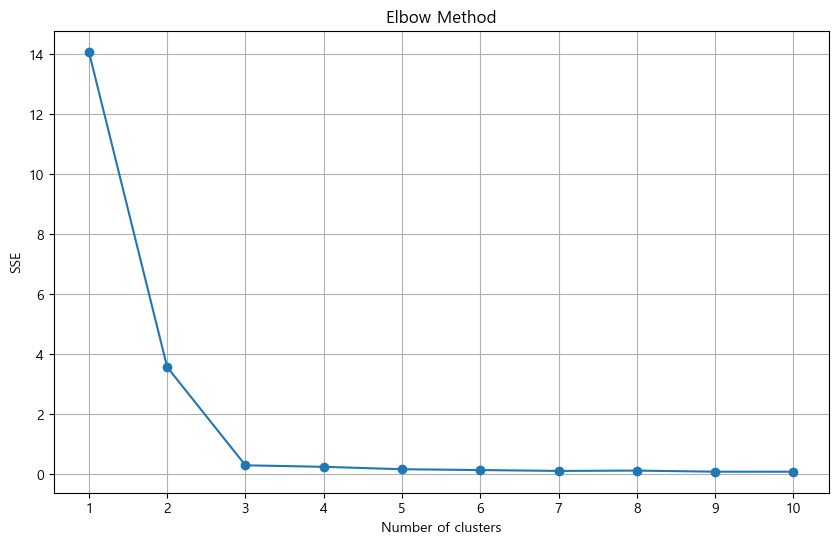

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터 개수 후보
max_k = 10
sse = []

# K-means 클러스터링 수행 및 SSE 계산
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(coordinates, sample_weight=weights)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()


In [14]:
centers_man = centers

In [15]:
#버스 

In [16]:
import pandas as pd
df = pd.read_csv('chuncheon_villages.csv',encoding='cp949')

In [17]:
result = df[df['노선번호'].isin(['100', '100-1','101','200','200-1','300','400','1', '2','3','4','6','7','7-1','7-2','7-3','8','8-1','9','10','10-1','11','12','13','13-1','14','15','16','16-1',
                            '17','18'])]

In [18]:
df = result

In [19]:
df

,노선번호,노선(ID),정류장순서,정류장(ID),정류장명,경도,위도,데이터기준일,주소
0,1,250000100,1,250026779,장학해온채A,127.75391,37.89731,2024-01-02,"춘천순환로, 장학리, 춘천시, 강원특별자치도, 24210, 대한민국"
1,1,250000100,2,250026778,장학교차로,127.75555,37.89383,2024-01-02,"장학교차로, 춘천순환로, 장학리, 춘천시, 강원특별자치도, 24209, 대한민국"
2,1,250000100,3,250026830,장학부영A,127.75278,37.89642,2024-01-02,"장학리, 춘천시, 강원특별자치도, 24209, 대한민국"
3,1,250000100,4,250001211,후평동종점,127.74865,37.89326,2024-01-02,"공단로, 만천리, 춘천시, 강원특별자치도, 24232, 대한민국"
4,1,250000100,5,250001377,춘천기계공고,127.74898,37.89114,2024-01-02,"춘천기계공고, 공단로, 만천리, 춘천시, 강원특별자치도, 24232, 대한민국"
...,...,...,...,...,...,...,...,...,...
3423,400,250040000,58,250026912,하일입구,127.75223,37.91401,2024-01-02,"하일입구, 춘천순환로, 장학리, 춘천시, 강원특별자치도, 24210, 대한민국"
3424,400,250040000,59,250026909,로컬푸드직매장,127.75090,37.91968,2024-01-02,"로컬푸드직매장, 춘천순환로, 율문리, 춘천시, 강원특별자치도, 24210, 대한민국"
3425,400,250040000,60,250001363,춘천한샘고등학교,127.75110,37.92521,2024-01-02,"춘천한샘고등학교, 율문길, 율문리, 춘천시, 강원특별자치도, 24206, 대한민국"
3426,400,250040000,61,250002056,신북읍행복센터,127.74702,37.92530,2024-01-02,"율문길, 율문리, 춘천시, 강원특별자치도, 24206, 대한민국"


In [20]:
filtered_df = df[df['주소'].str.contains('조양동|요선동|중앙로2가')]

df_combined = filtered_df 

In [21]:
df_combined

,노선번호,노선(ID),정류장순서,정류장(ID),정류장명,경도,위도,데이터기준일,주소
16,1,250000100,17,250001914,육림고개,127.73080,37.87719,2024-01-02,"육림고개, 금강로, 조양동, 춘천시, 강원특별자치도, 24352, 대한민국"
17,1,250000100,18,250002077,시청입구,127.72874,37.87957,2024-01-02,"명동입구, 금강로, 조양동, 춘천시, 강원특별자치도, 24352, 대한민국"
18,1,250000100,19,250002029,명동입구,127.72670,37.87969,2024-01-02,"명동입구, 중앙로, 중앙로2가, 춘천시, 강원특별자치도, 24353, 대한민국"
19,1,250000100,20,250001848,중앙시장/중앙초교,127.72505,37.87834,2024-01-02,"중앙시장/중앙초교, 중앙로, 중앙로2가, 춘천시, 강원특별자치도, 24358, 대한민국"
21,1,250000100,22,250001349,춘천시보건소,127.72076,37.87617,2024-01-02,"춘천시보건소, 중앙로, 중앙로2가, 춘천시, 강원특별자치도, 24276, 대한민국"
...,...,...,...,...,...,...,...,...,...
3234,200-1,250020001,38,250001847,중앙로입구,127.72415,37.87736,2024-01-02,"중앙로, 중앙로2가, 춘천시, 강원특별자치도, 24357, 대한민국"
3235,200-1,250020001,39,250001498,명동입구,127.72629,37.87906,2024-01-02,"명동입구, 중앙로, 중앙로2가, 춘천시, 강원특별자치도, 24354, 대한민국"
3236,200-1,250020001,40,250002076,M백화점,127.72915,37.87876,2024-01-02,"명동입구, 금강로, 조양동, 춘천시, 강원특별자치도, 24353, 대한민국"
3237,200-1,250020001,41,250001913,육림고개,127.73047,37.87724,2024-01-02,"육림고개, 금강로, 조양동, 춘천시, 강원특별자치도, 24355, 대한민국"


In [22]:
df_combined = df_combined.drop_duplicates(subset=['정류장명'], keep='first')

In [23]:
df_combined

,노선번호,노선(ID),정류장순서,정류장(ID),정류장명,경도,위도,데이터기준일,주소
16,1,250000100,17,250001914,육림고개,127.73080,37.87719,2024-01-02,"육림고개, 금강로, 조양동, 춘천시, 강원특별자치도, 24352, 대한민국"
17,1,250000100,18,250002077,시청입구,127.72874,37.87957,2024-01-02,"명동입구, 금강로, 조양동, 춘천시, 강원특별자치도, 24352, 대한민국"
18,1,250000100,19,250002029,명동입구,127.72670,37.87969,2024-01-02,"명동입구, 중앙로, 중앙로2가, 춘천시, 강원특별자치도, 24353, 대한민국"
19,1,250000100,20,250001848,중앙시장/중앙초교,127.72505,37.87834,2024-01-02,"중앙시장/중앙초교, 중앙로, 중앙로2가, 춘천시, 강원특별자치도, 24358, 대한민국"
21,1,250000100,22,250001349,춘천시보건소,127.72076,37.87617,2024-01-02,"춘천시보건소, 중앙로, 중앙로2가, 춘천시, 강원특별자치도, 24276, 대한민국"
22,1,250000100,23,250001353,춘천중학교,127.71770,37.87521,2024-01-02,"춘천중학교, 중앙로, 중앙로2가, 춘천시, 강원특별자치도, 24276, 대한민국"
68,1,250000100,69,250001348,춘천초등학교,127.72098,37.87602,2024-01-02,"춘천초등학교, 중앙로, 중앙로2가, 춘천시, 강원특별자치도, 24358, 대한민국"
69,1,250000100,70,250001847,중앙로입구,127.72415,37.87736,2024-01-02,"중앙로, 중앙로2가, 춘천시, 강원특별자치도, 24357, 대한민국"
71,1,250000100,72,250002076,M백화점,127.72915,37.87876,2024-01-02,"명동입구, 금강로, 조양동, 춘천시, 강원특별자치도, 24353, 대한민국"
101,2,250000200,13,250026768,e편한세상,127.72660,37.88410,2024-01-02,"서부대성로, 요선동, 춘천시, 강원특별자치도, 24271, 대한민국"


In [24]:
import folium

# Folium 지도 생성
map_center = [df_combined['위도'].mean(), df_combined['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)
# 다른 위치 정보 추가
for index, row in df_combined.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['정류장명'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

# 지도 출력
mymap

In [25]:
from sklearn.cluster import KMeans
import folium

# K-means 클러스터링 수행
k = 2  # 클러스터의 수 (임의로 지정)
coordinates = df_combined[['위도', '경도']]
kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates)
centers = kmeans.cluster_centers_

# Folium 지도 생성
map_center = [df_combined['위도'].mean(), df_combined['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# 클러스터 중심 위치 표시
for center in centers:
    folium.Marker(
        location=[center[0], center[1]],
        popup="클러스터 중심",
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(mymap)

# 다른 위치 정보 추가
for index, row in df_combined.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['정류장명'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

# 지도 출력
mymap


In [26]:
# 클러스터링 수행
kmeans = KMeans(n_clusters=2, random_state=0).fit(centers_man)
labels = kmeans.labels_

# Folium 지도 생성
m = folium.Map(location=[37.87, 127.74], zoom_start=14)

# 클러스터 중심을 지도에 추가
for i, center in enumerate(centers):
    folium.Marker(location=center, popup=f'Center {i+1}', icon=folium.Icon(color='red')).add_to(m)

# 클러스터링된 지점들을 지도에 추가
colors = ['blue', 'green']
for i, (location, label) in enumerate(zip(centers_man, labels)):
    folium.Marker(location=location, popup=f'Man {i+1}', icon=folium.Icon(color=colors[label])).add_to(m)

m

In [29]:
# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=2, random_state=0).fit(centers_man)
labels = kmeans.labels_

# Folium 지도 생성
map_center = [centers_man[:, 0].mean(), centers_man[:, 1].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# 클러스터 중심을 지도에 추가
for i, center in enumerate(centers):
    folium.CircleMarker(
        location=center,
        radius=30,
        color='green',
        fill=True,
        fill_color='green',
        popup=f'클러스터 중심 {i+1}'
    ).add_to(mymap)

# 클러스터링된 지점들을 지도에 추가
colors = ['red', 'blue']
for i, (location, label) in enumerate(zip(centers_man, labels)):
    folium.CircleMarker(
        location=location,
        radius=5,
        color=colors[label],
        fill=True,
        fill_color=colors[label],
        popup=f'지점 {i+1}'
    ).add_to(mymap)

# 지도 출력 (주피터 노트북이나 IPython 환경에서)
mymap

In [33]:
centers

array([[ 37.879826, 127.727372],
       [ 37.87516 , 127.717776]])

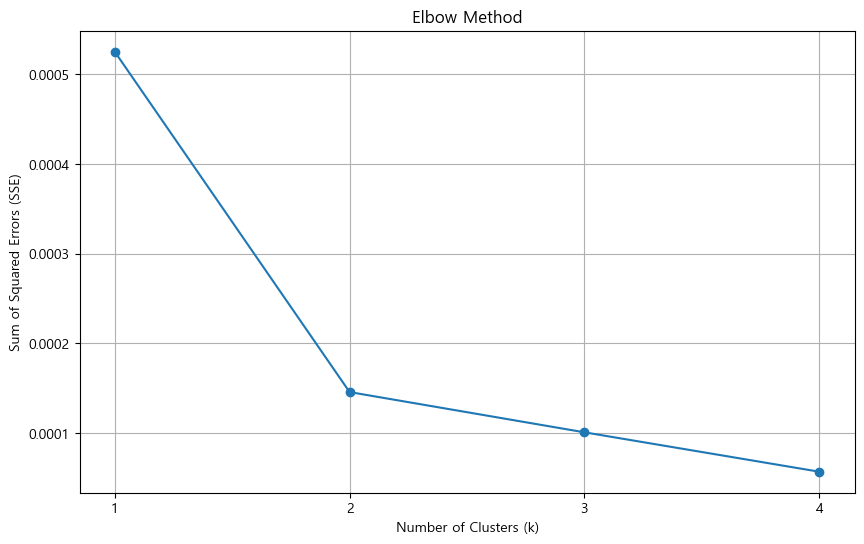

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE(Sum of Squared Errors)를 계산하는 함수
def calculate_sse(data, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        sse.append(kmeans.inertia_)
    return sse

# K의 범위 설정
k_range = range(1, 5)  # 1부터 4까지의 클러스터 개수를 시도
  # 1부터 10까지의 클러스터 개수를 시도

# SSE 계산
sse = calculate_sse(coordinates, k_range)

# Elbow Method 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()